In [7]:
import os
import numpy as np
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import *


In [8]:
import matplotlib.pyplot as plt
import random
from glob import glob
%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Loading**

In [10]:
base_dir = os.path.join(os.getcwd(), '/content/drive/MyDrive/WISE_ML_3-2/data')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [11]:
train_notes_dir = os.path.join(train_dir, 'notesImages')  # directory with our training cat pictures
train_other_dir = os.path.join(train_dir, 'other')
validation_notes_dir = os.path.join(validation_dir, 'notesImages')  # directory with our validation cat pictures
validation_other_dir = os.path.join(validation_dir, 'other')

In [12]:
num_notes_tr = len(os.listdir(train_notes_dir))
num_others_tr = len(os.listdir(train_other_dir))

num_notes_val = len(os.listdir(validation_notes_dir))
num_others_val = len(os.listdir(validation_other_dir))

total_train = num_notes_tr + num_others_tr
total_val = num_notes_val + num_others_val
total_train

175

In [13]:
total_val

64

In [14]:
# Initialising the CNN 
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape=(124, 124, 3)))
model.add(Activation('relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 1 & 2 with more hidden layers
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Dropout
model.add(Dropout(0.5))

# Step 4 - Flattening
model.add(Flatten()) 

# Step 5 - Full connection
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compiling the CNN
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 59, 59, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        1

In [16]:
model.load_weights('/content/drive/MyDrive/WISE_ML_3-2/notes_others.h5')


**Data Augmentation and Preparation**

In [17]:
batch_size = 32
IMG_SHAPE  = 124
# data augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,    
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,  
        target_size=(IMG_SHAPE,IMG_SHAPE),  
        batch_size=batch_size,
        class_mode='binary')  

Found 175 images belonging to 2 classes.


In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
validation_set = validation_datagen.flow_from_directory(batch_size=batch_size,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                        class_mode='binary')

Found 64 images belonging to 2 classes.


In [20]:
epochs=5
history = model.fit_generator(
        train_generator,
        steps_per_epoch= (total_train) // (batch_size),
        epochs=epochs,
        validation_data=validation_set,
        validation_steps= total_val // batch_size)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
5/5 [==============================] - 99s 17s/step - loss: 0.4156 - accuracy: 0.7948 - val_loss: 0.2707 - val_accuracy: 0.9844
Epoch 2/5
5/5 [==============================] - 12s 3s/step - loss: 0.3487 - accuracy: 0.8922 - val_loss: 0.2060 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 12s 2s/step - loss: 0.2845 - accuracy: 0.8994 - val_loss: 0.1343 - val_accuracy: 0.9844
Epoch 4/5
5/5 [==============================] - 12s 3s/step - loss: 0.1959 - accuracy: 0.9323 - val_loss: 0.0921 - val_accuracy: 0.9844
Epoch 5/5
5/5 [==============================] - 12s 2s/step - loss: 0.1524 - accuracy: 0.9553 - val_loss: 0.0690 - val_accuracy: 0.9844


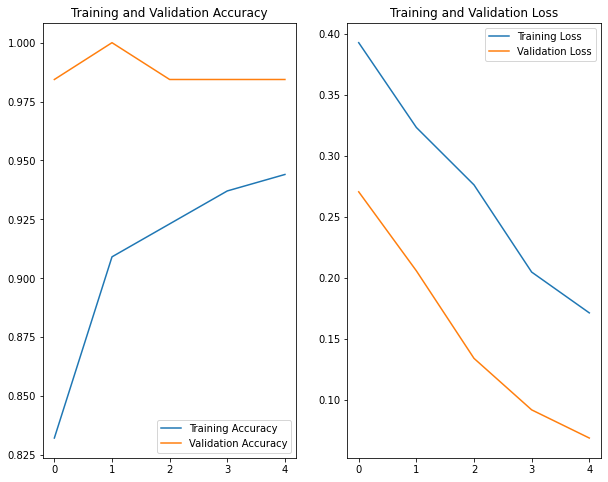

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:

def predict(file_path):
  
    img = load_img(file_path, target_size=(124, 124, 3))
    x = img_to_array(img) / 255. 
    y = model.predict(np.expand_dims(x, axis=0))
    return np.squeeze(y) < 0.5

In [25]:
if not os.path.exists('/content/drive/MyDrive/WISE_ML_3-2/notes'):
    os.mkdir('/content/drive/MyDrive/WISE_ML_3-2/notes')

In [26]:
files = glob('/content/drive/MyDrive/WISE_ML_3-2/validate/*.*')

for file_path in files:
    if predict(file_path): 
        file_name = file_path.split('/')[-1] 
        os.rename(file_path, '/content/drive/MyDrive/WISE_ML_3-2/notes/' + file_name) 

In [ ]:
model.save("NotesClassifierepoch2.h5")

In [ ]:
from keras.models import load_model
import tensorflow as tf

model = load_model("NotesClassifierepoch2.h5")


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

print("model converted")

# Save the model.
with open('NotesClassifier_Working_Thurs2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpn0kc37u2/assets
model converted


In [ ]:
from google.colab import files
files.download('NotesClassifier_Working_Thurs2.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
(total_train) // (batch_size)

5

In [ ]:
total_val // batch_size

2

In [ ]:
acc

[0.7972028255462646,
 0.8881118893623352,
 0.9300699234008789,
 0.9580419659614563,
 0.96875]

In [27]:
model.save_weights('/content/drive/MyDrive/WISE_ML_3-2/notes_others.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow import lite
converter=lite.TFLiteConverter.from_keras_model(model)
tfmodel=converter.convert()
open('NotesClassifier.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpj0m_rhul/assets


2887932

In [ ]:
from google.colab import files
files.download('NotesClassifier.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>